In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('final_data.csv')

In [4]:
df.head(2)

,brand,4G,5G,Announced,Status,Weight,Diameter,Display Size,ppi,body ratio,OS,battery_capacity,Price,CPU,ratio,pixel,GPU,Chipset,RAM,Storage,Weight Cat,Diameter Cat,Display Size Cat,ppi Cat,body ratio Cat,battery_capacity Cat,Price Cat,WLAN_COUNT,pixel Cat,SIM_Micro-SIM,SIM_Mini-SIM,SIM_Nano-SIM,SIM_eSIM,Display Type_AMOLED,Display Type_LCD,Display Type_OLED,Display Type_Others,Display Type_Retina,Display Type_TFT
0,0,True,False,2022.0,0,172.0,10.0,5.5,293.0,74.0,0,3000.0,100.0,4.0,3,1036800.0,5,4,2.0,32.0,2,3,3,2,0,2,3,2,2,False,False,True,False,False,True,False,False,False,False
1,0,True,False,2021.0,0,190.0,9.7,6.1,282.0,78.1,0,3000.0,110.0,8.0,11,1123200.0,4,8,2.0,32.0,2,0,4,2,0,2,3,2,0,False,False,True,False,False,True,False,False,False,False


# Part 1

In [5]:
X = df.drop('OS' , axis=1)
Y = df['OS']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [6]:
X_tr_tr, X_val_tr, y_tr_tr, y_val_tr = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

## Handling Imbalaced Data

###### ADASYN

In [7]:
'''

ads=ADASYN(random_state=42)


X_tr_tr_balanced_adasyn, y_tr_tr_balanced_adasyn = ads.fit_resample(X_tr_tr, y_tr_tr)

X_val_tr_balanced_adasyn, y_val_tr_balanced_adasyn = ads.fit_resample(X_val_tr, y_val_tr)



print(X_tr_tr.shape, y_tr_tr.shape, np.unique(y_tr_tr, return_counts=True))
print(X_val_tr.shape, y_val_tr.shape, np.unique(y_val_tr, return_counts=True))

print('------------------------------------')

print('Balanced :')
print(X_tr_tr_balanced_adasyn.shape, y_tr_tr_balanced_adasyn.shape, np.unique(y_tr_tr_balanced_adasyn, return_counts=True))
print(X_val_tr_balanced_adasyn.shape, y_val_tr_balanced_adasyn.shape, np.unique(y_val_tr_balanced_adasyn, return_counts=True))


'''

"\n\nads=ADASYN(random_state=42)\n\n\nX_tr_tr_balanced_adasyn, y_tr_tr_balanced_adasyn = ads.fit_resample(X_tr_tr, y_tr_tr)\n\nX_val_tr_balanced_adasyn, y_val_tr_balanced_adasyn = ads.fit_resample(X_val_tr, y_val_tr)\n\n\n\nprint(X_tr_tr.shape, y_tr_tr.shape, np.unique(y_tr_tr, return_counts=True))\nprint(X_val_tr.shape, y_val_tr.shape, np.unique(y_val_tr, return_counts=True))\n\nprint('------------------------------------')\n\nprint('Balanced :')\nprint(X_tr_tr_balanced_adasyn.shape, y_tr_tr_balanced_adasyn.shape, np.unique(y_tr_tr_balanced_adasyn, return_counts=True))\nprint(X_val_tr_balanced_adasyn.shape, y_val_tr_balanced_adasyn.shape, np.unique(y_val_tr_balanced_adasyn, return_counts=True))\n\n\n"

###### SMOTE

In [8]:
smt=SMOTE(random_state=42)


X_tr_tr_balanced_smote, y_tr_tr_balanced_smote = smt.fit_resample(X_tr_tr, y_tr_tr)

X_val_tr_balanced_smote, y_val_tr_balanced_smote = smt.fit_resample(X_val_tr, y_val_tr)



print(X_tr_tr.shape, y_tr_tr.shape, np.unique(y_tr_tr, return_counts=True))
print(X_val_tr.shape, y_val_tr.shape, np.unique(y_val_tr, return_counts=True))

print('------------------------------------')

print('Balanced :')
print(X_tr_tr_balanced_smote.shape, y_tr_tr_balanced_smote.shape, np.unique(y_tr_tr_balanced_smote, return_counts=True))
print(X_val_tr_balanced_smote.shape, y_val_tr_balanced_smote.shape, np.unique(y_val_tr_balanced_smote, return_counts=True))


(1911, 38) (1911,) (array([0, 1, 2], dtype=int64), array([1765,   97,   49], dtype=int64))
(338, 38) (338,) (array([0, 1, 2], dtype=int64), array([306,  24,   8], dtype=int64))
------------------------------------
Balanced :
(5295, 38) (5295,) (array([0, 1, 2], dtype=int64), array([1765, 1765, 1765], dtype=int64))
(918, 38) (918,) (array([0, 1, 2], dtype=int64), array([306, 306, 306], dtype=int64))


## Scaling the data

In [9]:
df.columns

Index(['brand', '4G', '5G', 'Announced', 'Status', 'Weight', 'Diameter',
       'Display Size', 'ppi', 'body ratio', 'OS', 'battery_capacity', 'Price',
       'CPU', 'ratio', 'pixel', 'GPU', 'Chipset', 'RAM', 'Storage',
       'Weight Cat', 'Diameter Cat', 'Display Size Cat', 'ppi Cat',
       'body ratio Cat', 'battery_capacity Cat', 'Price Cat', 'WLAN_COUNT',
       'pixel Cat', 'SIM_Micro-SIM', 'SIM_Mini-SIM', 'SIM_Nano-SIM',
       'SIM_eSIM', 'Display Type_AMOLED', 'Display Type_LCD',
       'Display Type_OLED', 'Display Type_Others', 'Display Type_Retina',
       'Display Type_TFT'],
      dtype='object')

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

selected_features = ['brand', '5G', '4G', 'battery_capacity', 'CPU', 'GPU', 'WLAN_COUNT', 'Chipset', 'SIM_Micro-SIM', 'SIM_Mini-SIM', 'SIM_Nano-SIM',
       'SIM_eSIM', 'Display Type_AMOLED', 'Display Type_LCD',
       'Display Type_OLED', 'Display Type_Others', 'Display Type_Retina',
       'Display Type_TFT']

X_train_selected = X_tr_tr_balanced_smote[selected_features]

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

In [11]:
X_val_selected = X_val_tr_balanced_smote[selected_features]

In [12]:
X_test_selected = X_test[selected_features]

## Model Selection and Scaling using GridSearch

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

param_grids = {
    'Decision Tree': {
        'max_depth': [3, 5, 7]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    }
}

results = {}

for scaler_name, scaler in [('StandardScaler', scaler_standard), ('MinMaxScaler', scaler_minmax)]:
    X_train_scaled = scaler.fit_transform(X_train_selected)
    for clf_name, clf in classifiers.items():
        grid_search = GridSearchCV(clf, param_grids[clf_name], cv=5, scoring='f1_weighted')
        grid_search.fit(X_train_scaled, y_tr_tr_balanced_smote)
        results[(scaler_name, clf_name)] = grid_search
        
        print(f"Scaler: {scaler_name}, Classifier: {clf_name}")
        print("Best Score:", grid_search.best_score_)
        print("Best Parameters:", grid_search.best_params_)
        print()

Scaler: StandardScaler, Classifier: Decision Tree
Best Score: 0.9771433023758453
Best Parameters: {'max_depth': 7}

Scaler: StandardScaler, Classifier: Random Forest
Best Score: 0.9918771703888851
Best Parameters: {'n_estimators': 50}

Scaler: StandardScaler, Classifier: AdaBoost
Best Score: 0.8578818539967099
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}

Scaler: StandardScaler, Classifier: XGBoost
Best Score: 0.9909328360879339
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}

Scaler: MinMaxScaler, Classifier: Decision Tree
Best Score: 0.9773322571810722
Best Parameters: {'max_depth': 7}

Scaler: MinMaxScaler, Classifier: Random Forest
Best Score: 0.9920662284074476
Best Parameters: {'n_estimators': 200}

Scaler: MinMaxScaler, Classifier: AdaBoost
Best Score: 0.8578818539967099
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}

Scaler: MinMaxScaler, Classifier: XGBoost
Best Score: 0.9909328360879339
Best Parameters: {'learning_rate': 0.1, 'n_es

In [14]:
best_scores = {}
best_params = {}
for (scaler_name, clf_name), grid_search in results.items():
    best_scores[(scaler_name, clf_name)] = grid_search.best_score_
    best_params[(scaler_name, clf_name)] = grid_search.best_params_

In [15]:
best_scores

{('StandardScaler', 'Decision Tree'): 0.9771433023758453,
 ('StandardScaler', 'Random Forest'): 0.9918771703888851,
 ('StandardScaler', 'AdaBoost'): 0.8578818539967099,
 ('StandardScaler', 'XGBoost'): 0.9909328360879339,
 ('MinMaxScaler', 'Decision Tree'): 0.9773322571810722,
 ('MinMaxScaler', 'Random Forest'): 0.9920662284074476,
 ('MinMaxScaler', 'AdaBoost'): 0.8578818539967099,
 ('MinMaxScaler', 'XGBoost'): 0.9909328360879339}

In [16]:
best_params

{('StandardScaler', 'Decision Tree'): {'max_depth': 7},
 ('StandardScaler', 'Random Forest'): {'n_estimators': 50},
 ('StandardScaler', 'AdaBoost'): {'learning_rate': 0.01, 'n_estimators': 200},
 ('StandardScaler', 'XGBoost'): {'learning_rate': 0.1, 'n_estimators': 200},
 ('MinMaxScaler', 'Decision Tree'): {'max_depth': 7},
 ('MinMaxScaler', 'Random Forest'): {'n_estimators': 200},
 ('MinMaxScaler', 'AdaBoost'): {'learning_rate': 0.01, 'n_estimators': 200},
 ('MinMaxScaler', 'XGBoost'): {'learning_rate': 0.1, 'n_estimators': 200}}

In [17]:
best_model_key = max(best_scores, key=best_scores.get)
best_model_key

('MinMaxScaler', 'Random Forest')

In [18]:
best_model = results[best_model_key].best_estimator_
best_model

RandomForestClassifier(n_estimators=200)

In [19]:
X_train_minmax_scaled = scaler_minmax.fit_transform(X_train_selected)

X_val_minmax_scaled = scaler_minmax.transform(X_val_selected)

X_test_minmax_scaled = scaler_minmax.transform(X_test_selected)

In [20]:
best_model.fit(X_train_minmax_scaled, y_tr_tr_balanced_smote)

RandomForestClassifier(n_estimators=200)

## Model Evaluation

In [21]:
y_val_pred_proba = best_model.predict_proba(X_val_minmax_scaled)

y_val_pred = best_model.predict(X_val_minmax_scaled)

accuracy_val = accuracy_score(y_val_tr_balanced_smote, y_val_pred)
precision_val = precision_score(y_val_tr_balanced_smote, y_val_pred, average='weighted')
recall_val = recall_score(y_val_tr_balanced_smote, y_val_pred, average='weighted')
f1_val = f1_score(y_val_tr_balanced_smote, y_val_pred, average='weighted')
auc_val = roc_auc_score(y_val_tr_balanced_smote, y_val_pred_proba, multi_class='ovr')

print("Validation Metrics:")
print("Accuracy:", accuracy_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_val)
print("AUC Score:", auc_val)

Validation Metrics:
Accuracy: 0.954248366013072
Precision: 0.9587527478884648
Recall: 0.954248366013072
F1 Score: 0.9540712945590994
AUC Score: 0.9962541116664531


In [22]:
y_test_pred_proba = best_model.predict_proba(X_test_minmax_scaled)

y_test_pred = best_model.predict(X_test_minmax_scaled)

accuracy_test = accuracy_score(Y_test, y_test_pred)
precision_test = precision_score(Y_test, y_test_pred, average='weighted')
recall_test = recall_score(Y_test, y_test_pred, average='weighted')
f1_test = f1_score(Y_test, y_test_pred, average='weighted')
auc_test = roc_auc_score(Y_test, y_test_pred_proba, multi_class='ovr')

print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("AUC Score:", auc_test)

Test Metrics:
Accuracy: 0.9798488664987406
Precision: 0.9783299592211258
Recall: 0.9798488664987406
F1 Score: 0.9784632361760827
AUC Score: 0.9684366490046653


### Validation Metrics:
- **Accuracy:** The model correctly predicts about 95.42% of the validation data samples. This means that the majority of the samples are classified correctly by the model.
- **Precision:** When the model predicts a positive class label, it is correct about 95.88% of the time on average. This indicates the model's ability to avoid false positives.
- **Recall:** The model identifies around 95.42% of the actual positive class instances in the validation dataset. This implies that the model captures a high proportion of the positive cases.
- **F1 Score:** The F1 score, which combines precision and recall, is approximately 95.41%. This suggests that the model achieves a good balance between precision and recall.
- **AUC Score:** The high AUC score of 99.63% indicates that the model has excellent discriminatory power between the positive and negative classes, making it effective for classification tasks.

### Test Metrics:
- **Accuracy:** On the test dataset, the model achieves an accuracy of 97.98%, indicating a high percentage of correctly predicted samples. This suggests that the model generalizes well to unseen data.
- **Precision:** With a precision score of 97.83%, the model maintains a high level of accuracy when predicting positive class instances on the test data.
- **Recall:** The model captures about 97.98% of the actual positive class instances in the test dataset, indicating its ability to effectively identify positive cases.
- **F1 Score:** The F1 score of 97.85% on the test data suggests a good balance between precision and recall, similar to the validation set.
- **AUC Score:** Despite being evaluated on unseen data, the AUC score of 96.84% on the test dataset indicates that the model's discriminatory power remains strong, further validating its effectiveness.

Overall, the model performs consistently well on both validation and test datasets, demonstrating high accuracy, precision, and recall, along with strong discriminatory power.

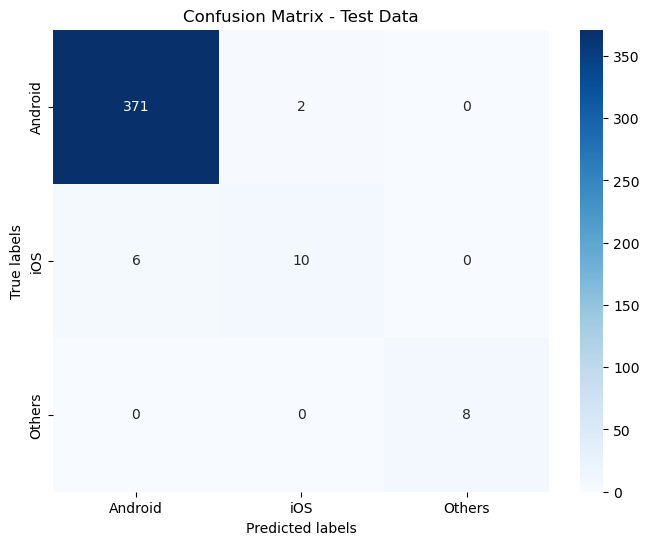

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Android', 'iOS', 'Others'], yticklabels=['Android', 'iOS', 'Others'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Data')
plt.show()


In [24]:
f1_android = f1_score(Y_test == 0, y_test_pred == 0, average='binary')
f1_ios = f1_score(Y_test == 1, y_test_pred == 1, average='binary')
f1_others = f1_score(Y_test == 2, y_test_pred == 2, average='binary')

print("F1 Score for Android class:", f1_android)
print("F1 Score for iOS class:", f1_ios)
print("F1 Score for Others class:", f1_others)

F1 Score for Android class: 0.9893333333333334
F1 Score for iOS class: 0.7142857142857143
F1 Score for Others class: 1.0


# Part 2

We just need to change the 'battery_capacity' in Selected_features to 'battery_capacity Cat'

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

selected_features = ['brand', '5G', '4G', 'battery_capacity Cat', 'CPU', 'GPU', 'WLAN_COUNT', 'Chipset', 'SIM_Micro-SIM', 'SIM_Mini-SIM', 'SIM_Nano-SIM',
       'SIM_eSIM', 'Display Type_AMOLED', 'Display Type_LCD',
       'Display Type_OLED', 'Display Type_Others', 'Display Type_Retina',
       'Display Type_TFT']

X_train_selected = X_tr_tr_balanced_smote[selected_features]

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()


X_val_selected = X_val_tr_balanced_smote[selected_features]


X_test_selected = X_test[selected_features]


from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

param_grids = {
    'Decision Tree': {
        'max_depth': [3, 5, 7]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    }
}

results = {}

for scaler_name, scaler in [('StandardScaler', scaler_standard), ('MinMaxScaler', scaler_minmax)]:
    X_train_scaled = scaler.fit_transform(X_train_selected)
    for clf_name, clf in classifiers.items():
        grid_search = GridSearchCV(clf, param_grids[clf_name], cv=5, scoring='f1_weighted')
        grid_search.fit(X_train_scaled, y_tr_tr_balanced_smote)
        results[(scaler_name, clf_name)] = grid_search
        
        print(f"Scaler: {scaler_name}, Classifier: {clf_name}")
        print("Best Score:", grid_search.best_score_)
        print("Best Parameters:", grid_search.best_params_)
        print()

Scaler: StandardScaler, Classifier: Decision Tree
Best Score: 0.9599079108430908
Best Parameters: {'max_depth': 7}

Scaler: StandardScaler, Classifier: Random Forest
Best Score: 0.9856439312416209
Best Parameters: {'n_estimators': 100}

Scaler: StandardScaler, Classifier: AdaBoost
Best Score: 0.8866922578380347
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}

Scaler: StandardScaler, Classifier: XGBoost
Best Score: 0.9856433122355849
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}

Scaler: MinMaxScaler, Classifier: Decision Tree
Best Score: 0.9602874862987563
Best Parameters: {'max_depth': 7}

Scaler: MinMaxScaler, Classifier: Random Forest
Best Score: 0.986399950645945
Best Parameters: {'n_estimators': 100}

Scaler: MinMaxScaler, Classifier: AdaBoost
Best Score: 0.8866922578380347
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}

Scaler: MinMaxScaler, Classifier: XGBoost
Best Score: 0.9856433122355849
Best Parameters: {'learning_rate': 0.1, 'n_es

In [26]:
best_scores = {}
best_params = {}
for (scaler_name, clf_name), grid_search in results.items():
    best_scores[(scaler_name, clf_name)] = grid_search.best_score_
    best_params[(scaler_name, clf_name)] = grid_search.best_params_

In [27]:
best_model_key = max(best_scores, key=best_scores.get)
best_model = results[best_model_key].best_estimator_
best_model

RandomForestClassifier()

In [29]:
X_train_minmax_scaled = scaler_minmax.fit_transform(X_train_selected)

X_val_minmax_scaled = scaler_minmax.transform(X_val_selected)

X_test_minmax_scaled = scaler_minmax.transform(X_test_selected)

best_model.fit(X_train_minmax_scaled, y_tr_tr_balanced_smote)

RandomForestClassifier()

In [30]:
y_val_pred_proba = best_model.predict_proba(X_val_minmax_scaled)

y_val_pred = best_model.predict(X_val_minmax_scaled)

accuracy_val = accuracy_score(y_val_tr_balanced_smote, y_val_pred)
precision_val = precision_score(y_val_tr_balanced_smote, y_val_pred, average='weighted')
recall_val = recall_score(y_val_tr_balanced_smote, y_val_pred, average='weighted')
f1_val = f1_score(y_val_tr_balanced_smote, y_val_pred, average='weighted')
auc_val = roc_auc_score(y_val_tr_balanced_smote, y_val_pred_proba, multi_class='ovr')

print("Validation Metrics:")
print("Accuracy:", accuracy_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_val)
print("AUC Score:", auc_val)

Validation Metrics:
Accuracy: 0.9607843137254902
Precision: 0.9626047711154093
Recall: 0.9607843137254902
F1 Score: 0.960723912206392
AUC Score: 0.9936500562461731


In [31]:
y_test_pred_proba = best_model.predict_proba(X_test_minmax_scaled)

y_test_pred = best_model.predict(X_test_minmax_scaled)

accuracy_test = accuracy_score(Y_test, y_test_pred)
precision_test = precision_score(Y_test, y_test_pred, average='weighted')
recall_test = recall_score(Y_test, y_test_pred, average='weighted')
f1_test = f1_score(Y_test, y_test_pred, average='weighted')
auc_test = roc_auc_score(Y_test, y_test_pred_proba, multi_class='ovr')

print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("AUC Score:", auc_test)

Test Metrics:
Accuracy: 0.9596977329974811
Precision: 0.9645716860191272
Recall: 0.9596977329974811
F1 Score: 0.9618281163835082
AUC Score: 0.9789365827428407


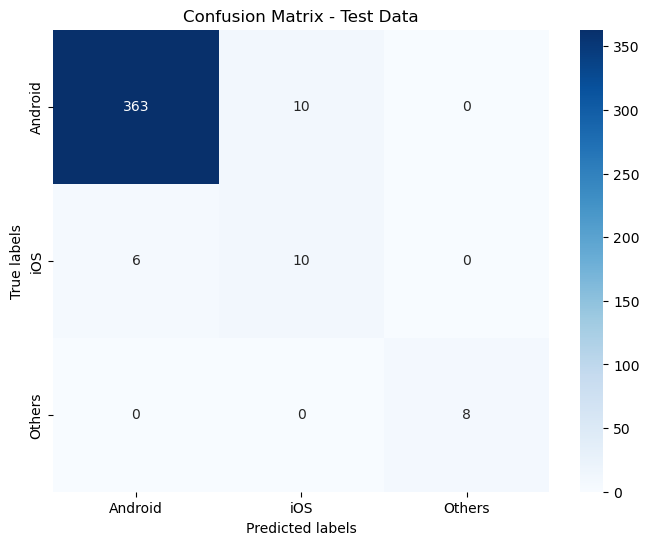

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Android', 'iOS', 'Others'], yticklabels=['Android', 'iOS', 'Others'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Data')
plt.show()


In [33]:
f1_android = f1_score(Y_test == 0, y_test_pred == 0, average='binary')
f1_ios = f1_score(Y_test == 1, y_test_pred == 1, average='binary')
f1_others = f1_score(Y_test == 2, y_test_pred == 2, average='binary')

print("F1 Score for Android class:", f1_android)
print("F1 Score for iOS class:", f1_ios)
print("F1 Score for Others class:", f1_others)

F1 Score for Android class: 0.9784366576819407
F1 Score for iOS class: 0.5555555555555556
F1 Score for Others class: 1.0


#### Part 2: Battery Capacity as Categorical Feature
- **Validation Metrics:**
  - **Accuracy:** After converting battery capacity into categorical features, the model achieved a slightly higher accuracy of around 96.08% on the validation dataset compared to Part 1.
  - **Precision:** The precision score increased slightly to approximately 96.26%, indicating a higher proportion of correct positive predictions.
  - **Recall:** The recall score remained consistent at about 96.08%, indicating that the model effectively captured positive class instances.
  - **F1 Score:** The F1 score, indicating the balance between precision and recall, is approximately 96.07%.
  - **AUC Score:** Despite the slight increase in accuracy, the AUC score decreased slightly to 99.37%, but still indicates strong discriminatory power.

- **Test Metrics:**
  - On the test dataset, the model achieved an accuracy of approximately 95.97%, which is slightly lower than the accuracy in Part 1.
  - However, the precision, recall, F1 score, and AUC score on the test set are still relatively high, indicating robust performance of the model even after converting battery capacity into categorical features.

Overall, converting battery capacity into categorical features resulted in a slight improvement in some metrics on the validation dataset, but the impact on the test dataset is less pronounced.

**Non-linear Relationship:** The relationship between battery capacity and Operating System may not be linear.
Binning assumes a constant relationship between the feature and the target, but if the relationship is non-linear, binning may not effectively capture it.